<a href="https://colab.research.google.com/github/MichaelMohn/FinalProject/blob/master/Urinalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

Hello! In order to run our project, you might need to upload our dataset. To do this, click on the folder icon on the left column. Once opened, a new row of icons should appear. Click on the upload button, and select the dataset we submitted.

## Introduction

In this project, the machine learning problem we are trying to solve is how to predict whether or not a patient has a urinary tract infection (UTI) using various medical measures. In our modern society, this problem matters as there are more than 3 million UTI cases in the US per year, making it a very common infection. The results of our predictive model can be used to more quickly diagnose patients who may have a UTI in order to help them receieve medical attention and start treatment as soon as possible. Our dataset from Kaggle is labeled and appropriate for supervised learning and classification analysis. It displays urinalysis test results from a local clinic in the Philippines with a diagnosis label of either positive (has a UTI) or negative (does not have a UTI) and 13 features as follows: number of patient, age of patient, gender of patient, urine color, urine transparency, pH of urine, presence of glucose, presence of protein, specific gravity of urine, epithelial cells, mucous threads, amorphous urates, and presence of bacteria in urine.



## Data Cleaning

This section of the project will focus on three areas:
1. Address any missing or incorrect data entries including anomalies
2. Perform Feature Engineering
3. Address the Class Imbalance Problem


Let's first remove any records with missing or NaN values as well as our column of record indices.

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('Dataset.csv')
print('Shape of orignal dataset:', data.shape)

# Must drop column of record indices
data = data.drop(data.columns[0], axis=1)

# Count the number of missing/NaN values in each row and sum them
nan_count = data.isnull().sum().sum()
print('Number of NaN values:', nan_count)

# Since there are only 4 out of 1436 records with NaN values, we can simply remove them
data = data.dropna()
print('Shape after removing missing/NaN values and index column:', data.shape)

print(data.head())

Shape of orignal dataset: (1436, 16)
Number of NaN values: 4
Shape after removing missing/NaN values and index column: (1432, 15)
    Age  Gender         Color   Transparency   Glucose   Protein   pH  \
0  76.0  FEMALE  LIGHT YELLOW          CLEAR  NEGATIVE  NEGATIVE  5.0   
1   9.0    MALE   DARK YELLOW  SLIGHTLY HAZY  NEGATIVE        1+  5.0   
2  12.0    MALE  LIGHT YELLOW  SLIGHTLY HAZY  NEGATIVE     TRACE  5.0   
3  77.0    MALE         BROWN         CLOUDY  NEGATIVE        1+  6.0   
4  29.0  FEMALE        YELLOW           HAZY  NEGATIVE     TRACE  6.0   

   Specific Gravity  WBC     RBC Epithelial Cells Mucous Threads  \
0             1.010  1-3     0-2       OCCASIONAL           RARE   
1             1.030  1-3     0-2             RARE            FEW   
2             1.030  0-3     0-2             RARE            FEW   
3             1.020  5-8  LOADED             RARE           RARE   
4             1.025  1-4     0-2             RARE           RARE   

  Amorphous Urates    

We ended up finding 4 NaN values, reducing our number of records to 1432.

## Data Exploration

Next, we will explore our data by looking at the distribution of all features. We will also look at the overall distribution of our positive and negative class labels.

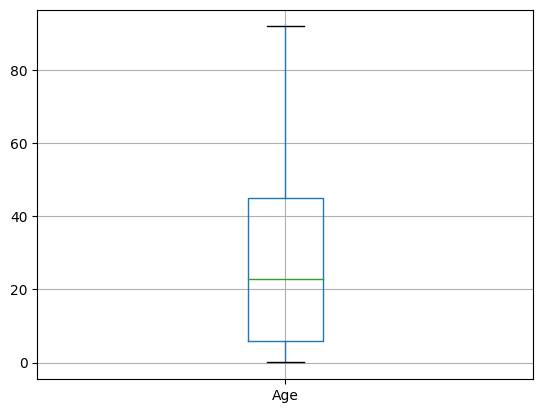

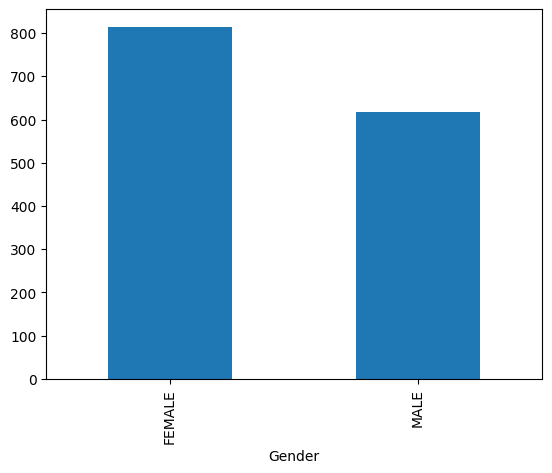

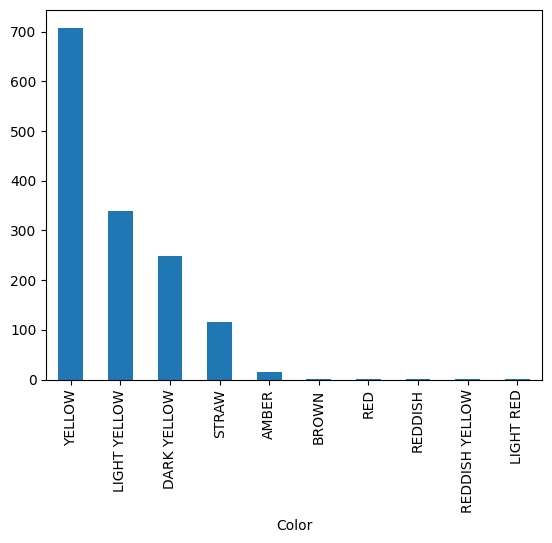

Color
YELLOW            708
LIGHT YELLOW      340
DARK YELLOW       248
STRAW             116
AMBER              15
BROWN               1
RED                 1
REDDISH             1
REDDISH YELLOW      1
LIGHT RED           1
Name: count, dtype: int64


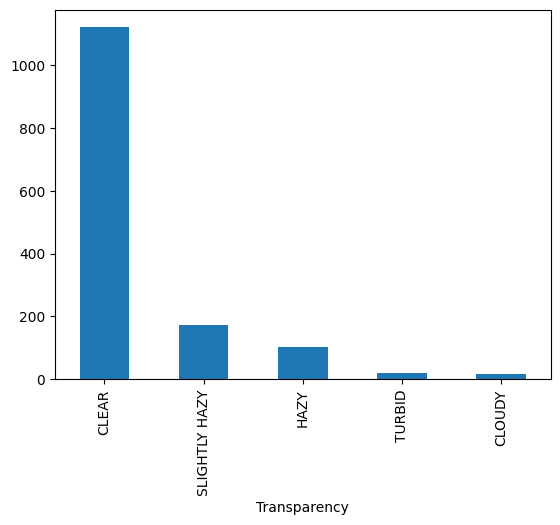

Transparency
CLEAR            1120
SLIGHTLY HAZY     172
HAZY              104
TURBID             20
CLOUDY             16
Name: count, dtype: int64


In [187]:
# Explore data by looking at the distribution of all features
features = data.drop('Diagnosis', axis=1)

features.boxplot('Age')
plt.show()

features['Gender'].value_counts().plot(kind='bar')
plt.show()

features['Color'].value_counts().plot(kind='bar')
plt.show()
print(features['Color'].value_counts())

features['Transparency'].value_counts().plot(kind='bar')
plt.show()
print(features['Transparency'].value_counts())


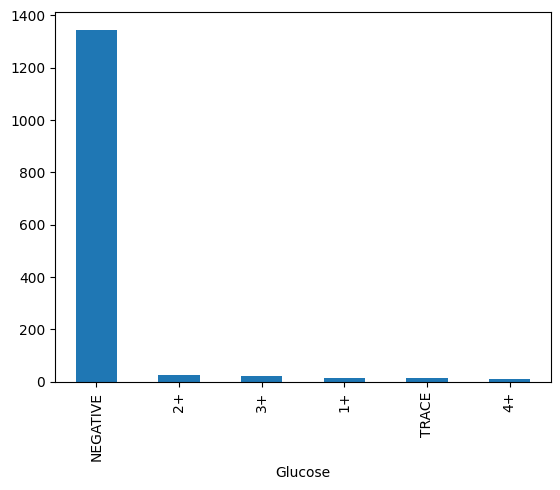

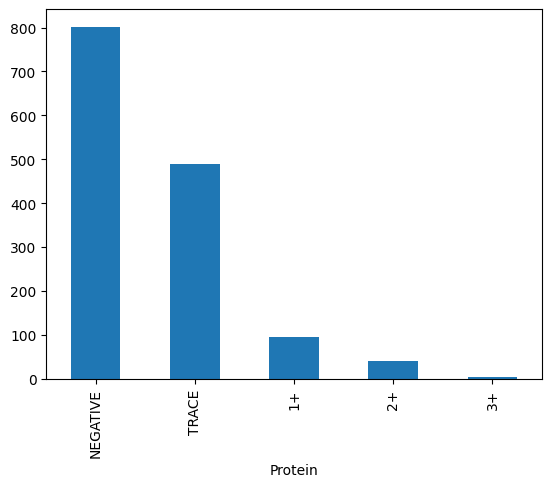

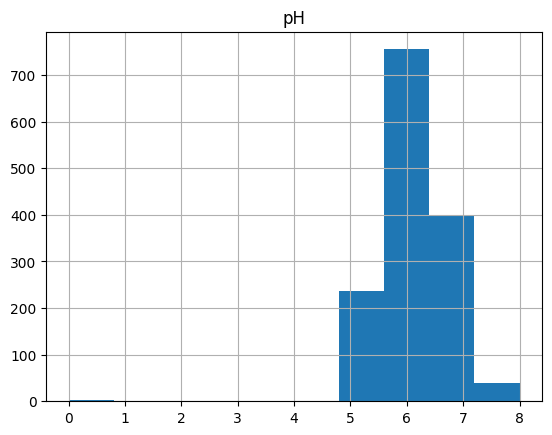

pH
6.0    755
6.5    304
5.0    236
7.0     96
7.5     27
8.0     12
0.0      2
Name: count, dtype: int64


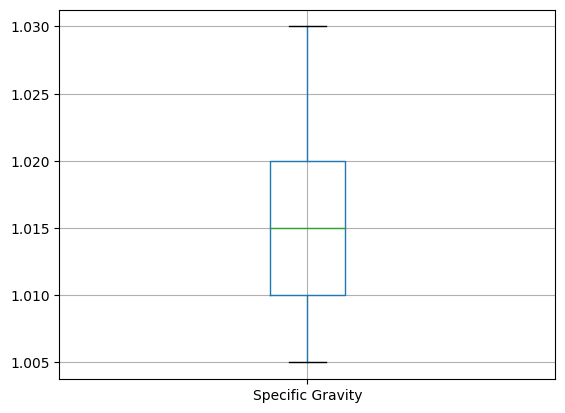

In [188]:
features['Glucose'].value_counts().plot(kind='bar')
plt.show()

features['Protein'].value_counts().plot(kind='bar')
plt.show()

features.hist('pH')
plt.show()
print(features['pH'].value_counts())

features.boxplot('Specific Gravity')
plt.show()

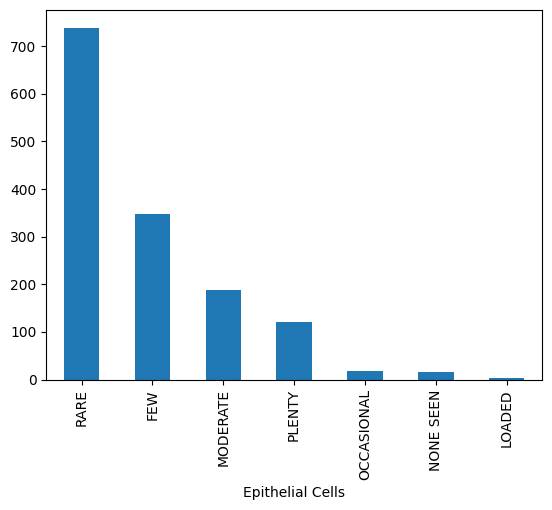

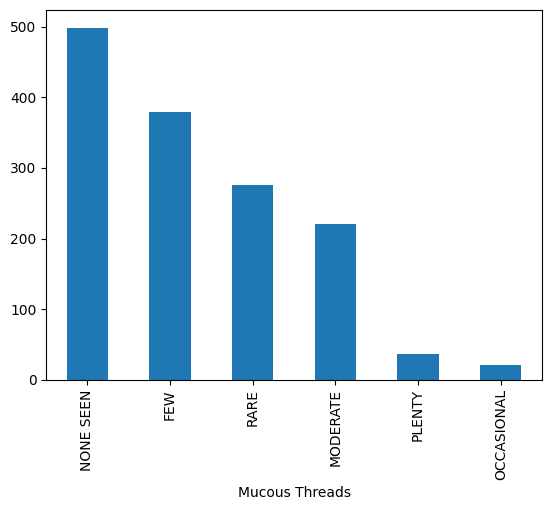

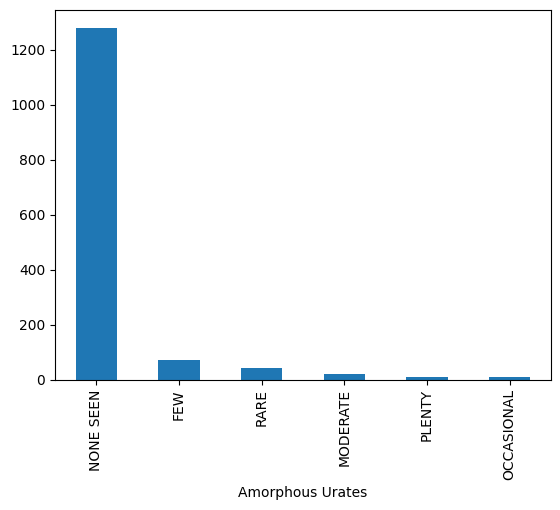

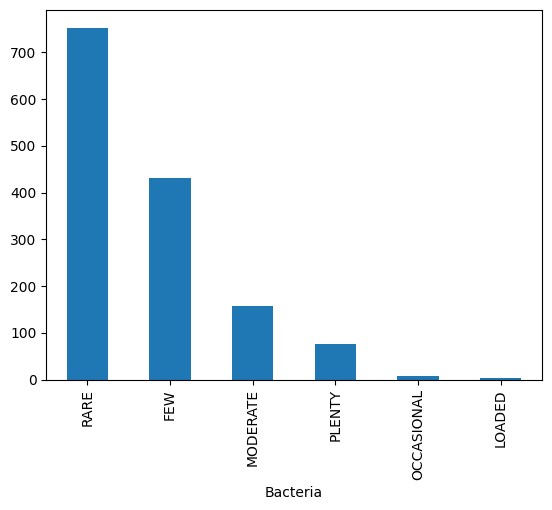

    Age  Gender         Color   Transparency   Glucose   Protein   pH  \
0  76.0  FEMALE  LIGHT YELLOW          CLEAR  NEGATIVE  NEGATIVE  5.0   
1   9.0    MALE   DARK YELLOW  SLIGHTLY HAZY  NEGATIVE        1+  5.0   
2  12.0    MALE  LIGHT YELLOW  SLIGHTLY HAZY  NEGATIVE     TRACE  5.0   
3  77.0    MALE         BROWN         CLOUDY  NEGATIVE        1+  6.0   
4  29.0  FEMALE        YELLOW           HAZY  NEGATIVE     TRACE  6.0   

   Specific Gravity  WBC     RBC Epithelial Cells Mucous Threads  \
0             1.010  1-3     0-2       OCCASIONAL           RARE   
1             1.030  1-3     0-2             RARE            FEW   
2             1.030  0-3     0-2             RARE            FEW   
3             1.020  5-8  LOADED             RARE           RARE   
4             1.025  1-4     0-2             RARE           RARE   

  Amorphous Urates    Bacteria Diagnosis  
0        NONE SEEN  OCCASIONAL  NEGATIVE  
1              FEW    MODERATE  NEGATIVE  
2         MODERATE     

In [189]:
features['Epithelial Cells'].value_counts().plot(kind='bar')
plt.show()

features['Mucous Threads'].value_counts().plot(kind='bar')
plt.show()

features['Amorphous Urates'].value_counts().plot(kind='bar')
plt.show()

features['Bacteria'].value_counts().plot(kind='bar')
plt.show()

print(data.head())

Anomaly Detection and Elimination: After looking at the distributions of each feature, we see that there
are 2 outliers that have a pH value of 0 while the other records have pH between 5.0 and 8.0. Since this is a very small number of records, we can simply remove them.

Shape before removing anomalies: (1432, 15)
Shape after removing anomalies: (1430, 15)


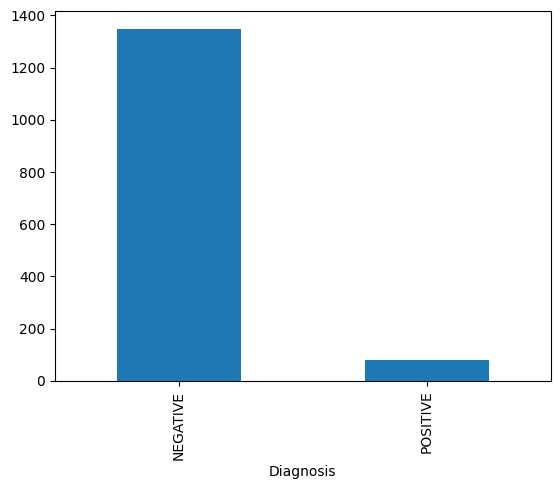

Diagnosis
NEGATIVE    1349
POSITIVE      81
Name: count, dtype: int64


In [190]:
# Remove the 2 records with pH value outliers
print("Shape before removing anomalies:", data.shape)
data = data[data.pH != 0]
print("Shape after removing anomalies:", data.shape)
features = data.drop('Diagnosis', axis=1)

# Explore data by looking at distribution of class labels
diagnosis = data['Diagnosis']
diagnosis.value_counts().plot(kind='bar')
plt.show()
print(diagnosis.value_counts())

We also note that there is a huge class imbalance issue in our dataset as there are only 81 patients who are diagnosed with having a UTI while 1349 patients do not have a UTI. In a future section, we will thoroughly address this problem.

## Feature Engineering

First, we will begin by one-hot encoding all of the categorical features in our dataset. Then, we will standardize them and perform dimensionality reduction using Principal Component Analysis (PCA).

In [191]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = data.drop(columns=['WBC', 'RBC'], axis=1)

data['Diagnosis'] = data['Diagnosis'].map({'POSITIVE': 1, 'NEGATIVE': 0})
data['Gender'] = data['Gender'].map({'MALE': 1, 'FEMALE': 0})

# One-Hot Encoding
data = pd.get_dummies(data, columns=['Color', 'Transparency', 'Glucose', 'Protein', 'Epithelial Cells', 'Mucous Threads', 'Amorphous Urates', 'Bacteria'])
features = data.drop('Diagnosis', axis=1)
diagnosis = data['Diagnosis']

# Standardize the features
numpy_array_features = StandardScaler().fit_transform(features)
scaled_features = pd.DataFrame(numpy_array_features)
print("Scaled Features:")
print(scaled_features.head())

# Perform PCA dimesionality reduction on the scaled features
pca = PCA(n_components=0.95, svd_solver='full')
numpy_array_features_2 = pca.fit_transform(scaled_features)
pca_features = pd.DataFrame(numpy_array_features_2)
print("PCA Features:")
print(pca_features.head())

Scaled Features:
         0         1         2         3        4          5         6   \
0  2.077954 -0.871159 -1.759493 -0.801918 -0.10296  -0.026454 -0.456937   
1 -0.777592  1.147896 -1.759493  1.943128 -0.10296  -0.026454  2.188487   
2 -0.649731  1.147896 -1.759493  1.943128 -0.10296  -0.026454 -0.456937   
3  2.120575  1.147896 -0.089347  0.570605 -0.10296  37.802116 -0.456937   
4  0.074810 -0.871159 -0.089347  1.256866 -0.10296  -0.026454 -0.456937   

         7         8         9   ...        45        46        47        48  \
0 -0.026454  1.790498 -0.026454  ...  0.344871 -0.075006 -0.088045 -0.173952   
1 -0.026454 -0.558504 -0.026454  ... -2.899637 -0.075006 -0.088045 -0.173952   
2 -0.026454  1.790498 -0.026454  ... -2.899637 -0.075006 -0.088045 -0.173952   
3 -0.026454 -0.558504 -0.026454  ...  0.344871 -0.075006 -0.088045 -0.173952   
4 -0.026454 -0.558504 -0.026454  ...  0.344871 -0.075006 -0.088045 -0.173952   

         49        50        51         52        5

## Correcting the Class Imbalance Problem

In order to address the class imbalance problem, we will implement and evaluate four techniques: 2 oversampling algorithms (SMOTE and ADASYN) and 2 hybridization (combination of oversampling and undersampling) algorithms (SMOTE + Tomek Links and SMOTE + ENN).

In [192]:
from typing import Counter
import sklearn
from sklearn.model_selection import train_test_split, KFold
import imblearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
import numpy as np
from sklearn.utils import shuffle

def kfold_decision_tree(X_data, Y_data, method):
  X_data, Y_data = shuffle(X_data, Y_data, random_state=10)

  fold_size = len(X_data) // 5
  scores = []
  precisions = []
  recalls = []
  for i in range(5):
    start_idx = i * fold_size
    end_idx = start_idx + fold_size

    X_train = np.concatenate([X_data[:start_idx], X_data[end_idx:]], axis=0)
    Y_train = np.concatenate([Y_data[:start_idx], Y_data[end_idx:]], axis=0)
    X_test = X_data[start_idx:end_idx]
    Y_test = Y_data[start_idx:end_idx]

    if(method == 0):
      X_adjusted = X_train
      Y_adjusted = Y_train
      counter = Counter(Y_adjusted)
      print('After no technique:', counter)
    elif(method == 1):
      smt = SMOTE()
      X_adjusted, Y_adjusted = smt.fit_resample(X_train, Y_train)
      counter = Counter(Y_adjusted)
      print('After SMOTE:', counter)
    elif(method == 2):
      ada = ADASYN(random_state=10)
      X_adjusted, Y_adjusted = ada.fit_resample(X_train, Y_train)
      counter = Counter(Y_adjusted)
      print('After ADASYN:', counter)
    elif(method == 3):
      smtom = SMOTETomek(random_state=10)
      X_adjusted, Y_adjusted = smtom.fit_resample(X_train, Y_train)
      counter = Counter(Y_adjusted)
      print('After SMOTE + Tomek Links:', counter)
    elif(method == 4):
      smenn = SMOTEENN()
      X_adjusted, Y_adjusted = smenn.fit_resample(X_train, Y_train)
      counter = Counter(Y_adjusted)
      print('After SMOTE + ENN:', counter)

    tree = DecisionTreeClassifier(random_state=10)
    tree.fit(X_adjusted, Y_adjusted)
    predictions = tree.predict(X_test)

    scores.append(accuracy_score(Y_test, predictions))
    precisions.append(precision_score(Y_test, predictions))
    recalls.append(recall_score(Y_test, predictions))

  return sum(scores), sum(precisions), sum(recalls)

#Standard Data
counter = Counter(diagnosis)
print('Original Data:', counter)
print("\nOriginal Data")
acc, prec, rec = kfold_decision_tree(pca_features, diagnosis, 0)
print("Accuracy:", acc/5)
print("Precision:", prec/5)
print("Recall:", rec/5)
print("F-Score", 2*((prec/5)*(rec/5)/((prec/5) + (rec/5))))

# Using SMOTE (oversampling) technique taught in class
from imblearn.over_sampling import SMOTE
print("\nSMOTE")
acc, prec, rec = kfold_decision_tree(pca_features, diagnosis, 1)
print("Accuracy:", acc/5)
print("Precision:", prec/5)
print("Recall:", rec/5)
print("F-Score", 2*((prec/5)*(rec/5)/((prec/5) + (rec/5))))

# Using ADASYN (oversampling) Algorithm
# Generalized form of SMOTE that considers density distribution of difficult-to-learn samples
from imblearn.over_sampling import ADASYN
print("\nADASYN")
acc, prec, rec = kfold_decision_tree(pca_features, diagnosis, 2)
print("Accuracy:", acc/5)
print("Precision:", prec/5)
print("Recall:", rec/5)
print("F-Score", 2*((prec/5)*(rec/5)/((prec/5) + (rec/5))))

# Hybridization: using SMOTE (oversampling) and Tomek Links (undersampling)
# After SMOTE, Tomek Links remove close observations of opposite classes to increase separation
print("\nSMOTE + Tomek Links")
from imblearn.combine import SMOTETomek
acc, prec, rec = kfold_decision_tree(pca_features, diagnosis, 3)
print("Accuracy:", acc/5)
print("Precision:", prec/5)
print("Recall:", rec/5)
print("F-Score", 2*((prec/5)*(rec/5)/((prec/5) + (rec/5))))


# Hybridization: using SMOTE (oversampling) and ENN (undersampling)
# After SMOTE, nearest neighbors of each instance is estimated and instance is eliminated if misclassified NN
from imblearn.combine import SMOTEENN
print("\nSMOTE + ENN")
acc, prec, rec = kfold_decision_tree(pca_features, diagnosis, 4)
print("Accuracy:", acc/5)
print("Precision:", prec/5)
print("Recall:", rec/5)
print("F-Score", 2*((prec/5)*(rec/5)/((prec/5) + (rec/5))))

Original Data: Counter({0: 1349, 1: 81})

Original Data
After no technique: Counter({0: 1078, 1: 66})
After no technique: Counter({0: 1079, 1: 65})
After no technique: Counter({0: 1079, 1: 65})
After no technique: Counter({0: 1083, 1: 61})
After no technique: Counter({0: 1077, 1: 67})
Accuracy: 0.8944055944055943
Precision: 0.17405445431761218
Recall: 0.23285714285714282
F-Score 0.19920701801257362

SMOTE
After SMOTE: Counter({0: 1078, 1: 1078})
After SMOTE: Counter({0: 1079, 1: 1079})
After SMOTE: Counter({0: 1079, 1: 1079})
After SMOTE: Counter({0: 1083, 1: 1083})
After SMOTE: Counter({0: 1077, 1: 1077})
Accuracy: 0.8468531468531468
Precision: 0.10328548644338117
Recall: 0.23440476190476192
F-Score 0.1433894521764114

ADASYN
After ADASYN: Counter({1: 1082, 0: 1078})
After ADASYN: Counter({1: 1080, 0: 1079})
After ADASYN: Counter({0: 1079, 1: 1078})
After ADASYN: Counter({0: 1083, 1: 1069})
After ADASYN: Counter({1: 1084, 0: 1077})
Accuracy: 0.8524475524475523
Precision: 0.10250098367

## Random Forest
Based on the previous results, we will assume that the SMOTE-ENN approach towards the class imbalance provides the best training data for our models.

We will use this new dataset to train our future models, in this case, a Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier

X_data_RF, Y_data_RF = shuffle(pca_features, diagnosis, random_state=10)
fold_size = len(X_data_RF) // 5

accuracies = []
precisions = []
recalls = []
for i in range(5):
  start_idx = i * fold_size
  end_idx = start_idx + fold_size

  X_train = np.concatenate([X_data_RF[:start_idx], X_data_RF[end_idx:]], axis=0)
  Y_train = np.concatenate([Y_data_RF[:start_idx], Y_data_RF[end_idx:]], axis=0)
  X_test = X_data_RF[start_idx:end_idx]
  Y_test = Y_data_RF[start_idx:end_idx]

  smenn = SMOTEENN()
  X_smenn, Y_smenn = smenn.fit_resample(X_train, Y_train)

  rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=10)
  rf.fit(X_smenn, Y_smenn)

  predictions = rf.predict(X_test)
  accuracies.append(accuracy_score(Y_test, predictions))
  precisions.append(precision_score(Y_test, predictions))
  recalls.append(recall_score(Y_test, predictions))

print("Accuracy:", sum(accuracies)/5)
print("Precision:", sum(precisions)/5)
print("Recall:", sum(recalls)/5)
print("F-Score", 2*((sum(precisions)/5)*(sum(recalls)/5)/((sum(precisions)/5) + (sum(recalls)/5))))

Accuracy: 0.8713286713286713
Precision: 0.20423280423280418
Recall: 0.4538095238095238
F-Score 0.28169249206476826


## Hyperparameter Tuning

We then looped through this process while trying different hyperparameters to help narrow down our model. We focused on adjusting two different parameters, being n_estimators and max_depth. Remember, these parameters reflect the amount of trees that make up the forest and the maximum splits in each forest, respectively.

The code is commented out due to its long run time, but you may uncomment it and run it if you like.

In [194]:
#X_data_RF, Y_data_RF = shuffle(pca_features, diagnosis, random_state=10)
#fold_size = len(X_data_RF) // 5

#f_scores = []
#for j in range(10):
#  accuracies = []
#  precisions = []
#  recalls = []
#  for i in range(5):
#    start_idx = i * fold_size
#    end_idx = start_idx + fold_size

#    X_train = np.concatenate([X_data_RF[:start_idx], X_data_RF[end_idx:]], axis=0)
#    Y_train = np.concatenate([Y_data_RF[:start_idx], Y_data_RF[end_idx:]], axis=0)
#    X_test = X_data_RF[start_idx:end_idx]
#    Y_test = Y_data_RF[start_idx:end_idx]

#    smenn = SMOTEENN()
#    X_smenn, Y_smenn = smenn.fit_resample(X_train, Y_train)

#    rf = RandomForestClassifier(n_estimators=((j+1)*10), random_state=10)
#    rf.fit(X_smenn, Y_smenn)

#    predictions = rf.predict(X_test)
#    accuracies.append(accuracy_score(Y_test, predictions))
#    precisions.append(precision_score(Y_test, predictions))
#    recalls.append(recall_score(Y_test, predictions))

#  f_score = 2*((sum(precisions)/5)*(sum(recalls)/5)/((sum(precisions)/5) + (sum(recalls)/5)))
#  f_scores.append(f_score)

#series = pd.Series(f_scores)
#series.plot(label='N-Estimators vs. F-Score')
#plt.legend()
#plt.show()

In [195]:
#X_data_RF, Y_data_RF = shuffle(pca_features, diagnosis, random_state=10)
#fold_size = len(X_data_RF) // 5

#f_scores = []
#for j in range(20):
#  accuracies = []
#  precisions = []
#  recalls = []
#  for i in range(5):
#    start_idx = i * fold_size
#    end_idx = start_idx + fold_size

#    X_train = np.concatenate([X_data_RF[:start_idx], X_data_RF[end_idx:]], axis=0)
#    Y_train = np.concatenate([Y_data_RF[:start_idx], Y_data_RF[end_idx:]], axis=0)
#    X_test = X_data_RF[start_idx:end_idx]
#    Y_test = Y_data_RF[start_idx:end_idx]

#    smenn = SMOTEENN()
#    X_smenn, Y_smenn = smenn.fit_resample(X_train, Y_train)

#    rf = RandomForestClassifier(n_estimators = 60, max_depth=((j+1)), random_state=10)
#    rf.fit(X_smenn, Y_smenn)

#    predictions = rf.predict(X_test)
#    accuracies.append(accuracy_score(Y_test, predictions))
#    precisions.append(precision_score(Y_test, predictions))
#    recalls.append(recall_score(Y_test, predictions))

#  f_score = 2*((sum(precisions)/5)*(sum(recalls)/5)/((sum(precisions)/5) + (sum(recalls)/5)))
#  f_scores.append(f_score)

#series = pd.Series(f_scores)
#series.plot(label='Max Depth vs. F-Score')
#plt.legend()
#plt.show()

From the hyperparameter tuning, we realized that a n_estimators value of about 50 and a max depth of 10 work best for our model.

While an F-Score of .25 is an improvement of about 20% from the standard decision tree, this is a bit of a dissapointing improvement. Let's go ahead and try this process with the alternative types of class imbalancing solutions.

In [196]:
for j in range(3):
  X_data_RF, Y_data_RF = shuffle(pca_features, diagnosis, random_state=10)
  fold_size = len(X_data_RF) // 5

  accuracies = []
  precisions = []
  recalls = []
  for i in range(5):
    start_idx = i * fold_size
    end_idx = start_idx + fold_size

    X_train = np.concatenate([X_data_RF[:start_idx], X_data_RF[end_idx:]], axis=0)
    Y_train = np.concatenate([Y_data_RF[:start_idx], Y_data_RF[end_idx:]], axis=0)
    X_test = X_data_RF[start_idx:end_idx]
    Y_test = Y_data_RF[start_idx:end_idx]

    if(j == 0):
      if(i == 0):
        print("SMOTE")
      smote = SMOTE()
      X_adjusted, Y_adjusted = smote.fit_resample(X_train, Y_train)
    elif(j == 1):
      if(i == 0):
        print("ADASYN")
      ada = ADASYN()
      X_adjusted, Y_adjusted = ada.fit_resample(X_train, Y_train)
    elif(j == 2):
      if(i == 0):
        print("SMOTE-Tomek")
      smtom = SMOTETomek()
      X_adjusted, Y_adjusted = smtom.fit_resample(X_train, Y_train)

    rf = RandomForestClassifier(n_estimators=60, random_state=10)
    rf.fit(X_adjusted, Y_adjusted)


    predictions = rf.predict(X_test)
    accuracies.append(accuracy_score(Y_test, predictions))
    precisions.append(precision_score(Y_test, predictions))
    recalls.append(recall_score(Y_test, predictions))


  print("Accuracy:", sum(accuracies)/5)
  print("Precision:", sum(precisions)/5)
  print("Recall:", sum(recalls)/5)
  print("F-Score", 2*((sum(precisions)/5)*(sum(recalls)/5)/((sum(precisions)/5) + (sum(recalls)/5))))


SMOTE
Accuracy: 0.916083916083916
Precision: 0.20098124098124096
Recall: 0.1742857142857143
F-Score 0.18668395205502025
ADASYN
Accuracy: 0.9216783216783216
Precision: 0.27213286713286716
Recall: 0.24357142857142855
F-Score 0.2570612335825811
SMOTE-Tomek
Accuracy: 0.9223776223776223
Precision: 0.2585564435564435
Recall: 0.21357142857142858
F-Score 0.23392081796747474


#Conclusion

Here we see that regardless of which class balancing method we use, we're going to end up with a similar f-score either way. Perhaps decision trees simply aren't going to be best approach for us to anaylze our data.

# Clustering

Although we were generally unsuccessful with creating insightful decision trees and forests, perhaps we can at least cluster our data into useful groups. While clustering does provide an alternative approach to how we analyze our data, it does have a significant weakness when it comes to high dimensionality datasets, which this certainly is.

### K-Nearest Neighbors Clustering

As A refresher of KNN, the prediction for a new data point is based on the majority vote of the labels of its k nearest neighbors in the training dataset.

Let's see how our dataset does when being clustered

In [197]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier

scores = np.empty(7)
for j in range(20):
  for i in range(1, 8):
    X_data_KNN, Y_data_KNN = shuffle(pca_features, diagnosis, random_state=j)
    fold_size = len(X_data_KNN) // 5
    start_idx = i * fold_size
    end_idx = start_idx + fold_size

    X_train = np.concatenate([X_data_KNN[:start_idx], X_data_KNN[end_idx:]], axis=0)
    Y_train = np.concatenate([Y_data_KNN[:start_idx], Y_data_KNN[end_idx:]], axis=0)
    X_test = X_data_KNN[start_idx:end_idx]
    Y_test = Y_data_KNN[start_idx:end_idx]

    knn = KNeighborsClassifier((i+1))
    knn.fit(X_train, Y_train)
    knn_Clusters = knn.predict(X_train)
    knn_Silhouette = silhouette_score(X_train, knn_Clusters)
    scores[i-1] = scores[i-1] + knn_Silhouette
print(scores/20)

[0.23494892 0.23090547 0.25204886 0.26248871 0.15847977 0.19501797
 0.38603556]


As you can see, the trend continues when it comes to this being a challening label to predict. The highest Silhouette score we can achieve without overfitting remains around .26, a fairly dissapointing score on the silhouette scale.

### Hierarchial Clustering

In [198]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering


for i in range(2,5):
  hierarchical_cluster = AgglomerativeClustering(n_clusters=(i))
  cluster_labels = hierarchical_cluster.fit_predict(pca_features)
  silhouette_avg = silhouette_score(pca_features, cluster_labels)
  print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.1710460446601236
Silhouette Score: 0.1620463593427588
Silhouette Score: 0.02007691532076903


As you can see, the silhouette score is not promising for Hierarchial Clustering either.

Let's try plotting all the different types of Hierarchial clusters and see if any of them display any kind of separation line that would be useful for us to cluster off of.

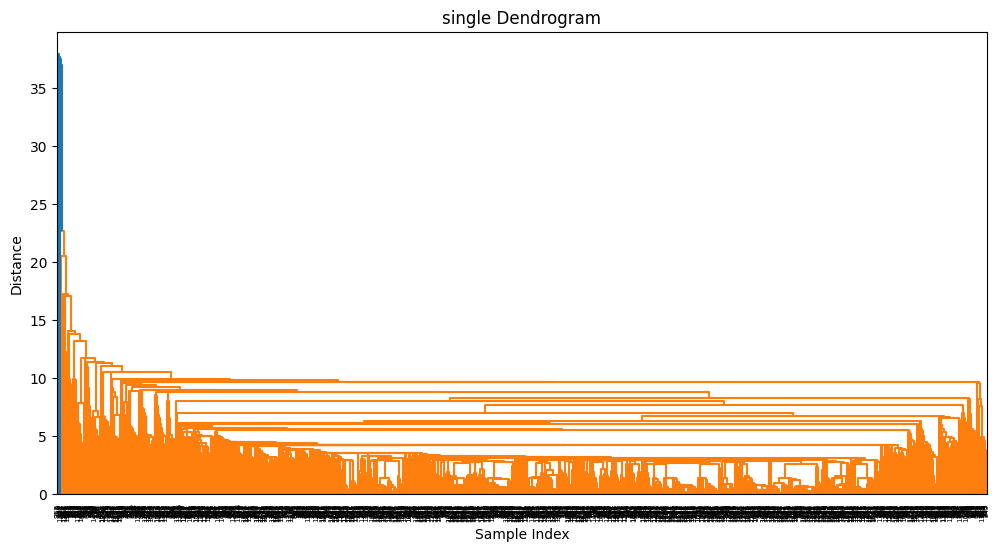

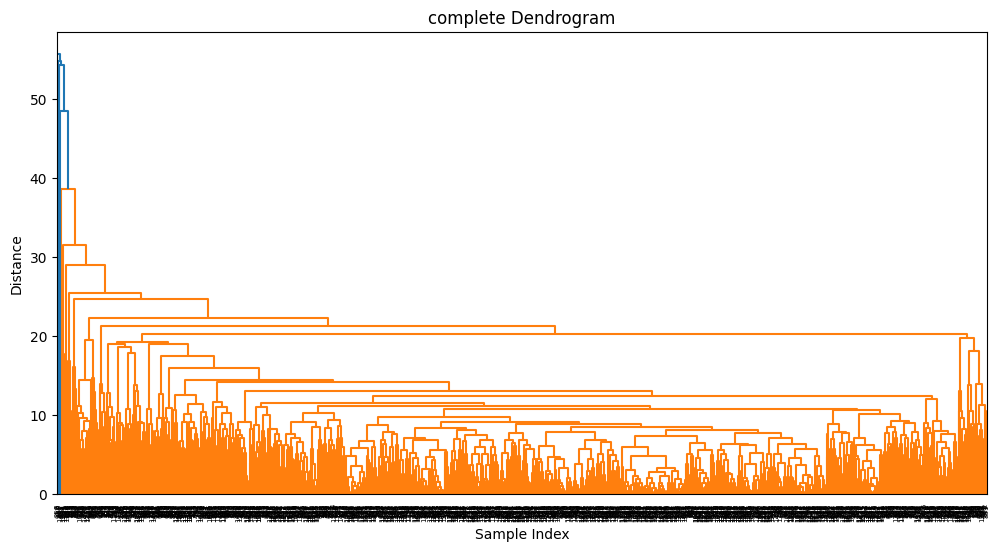

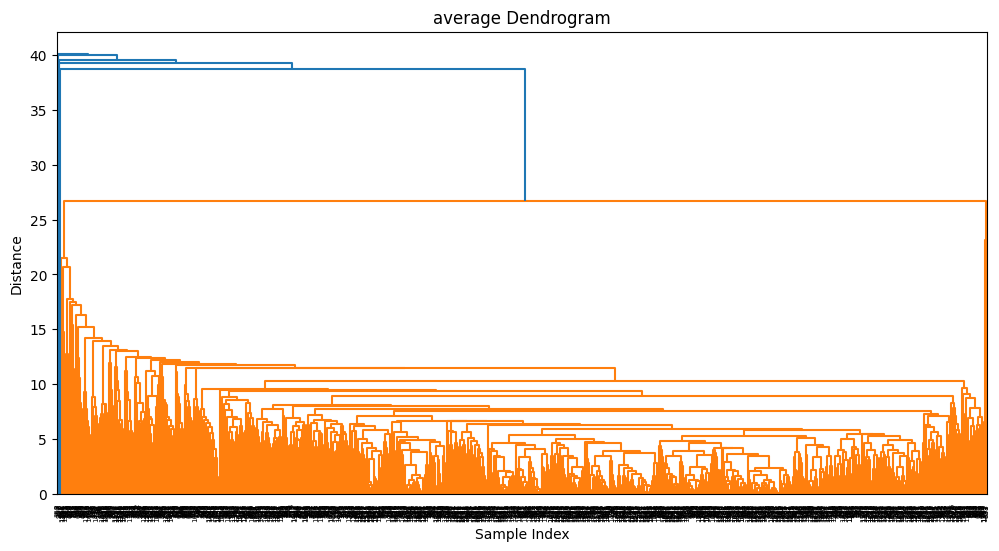

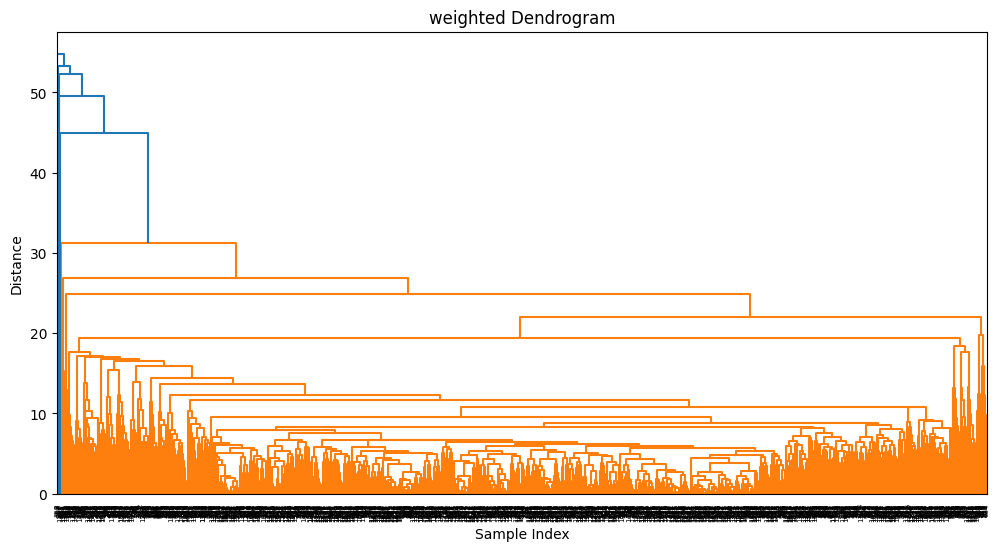

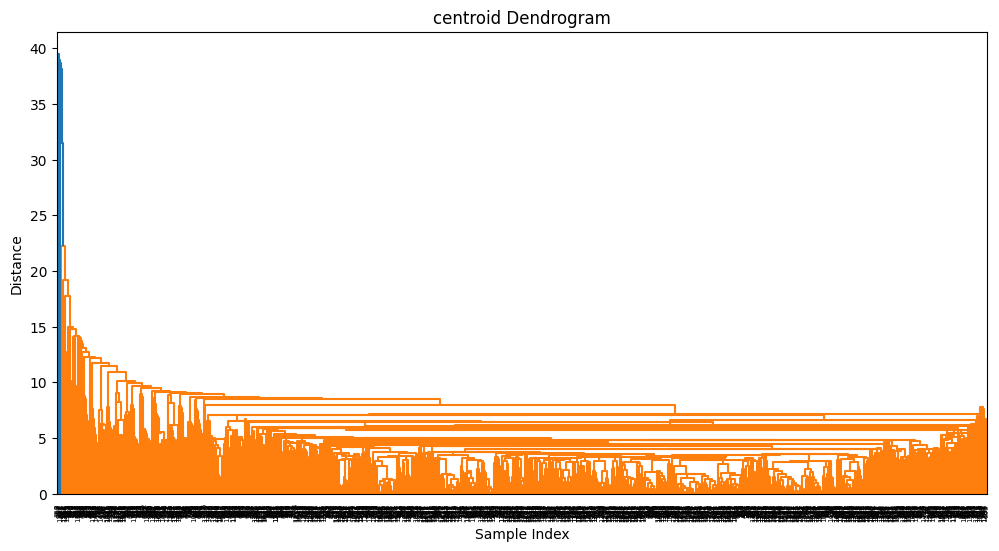

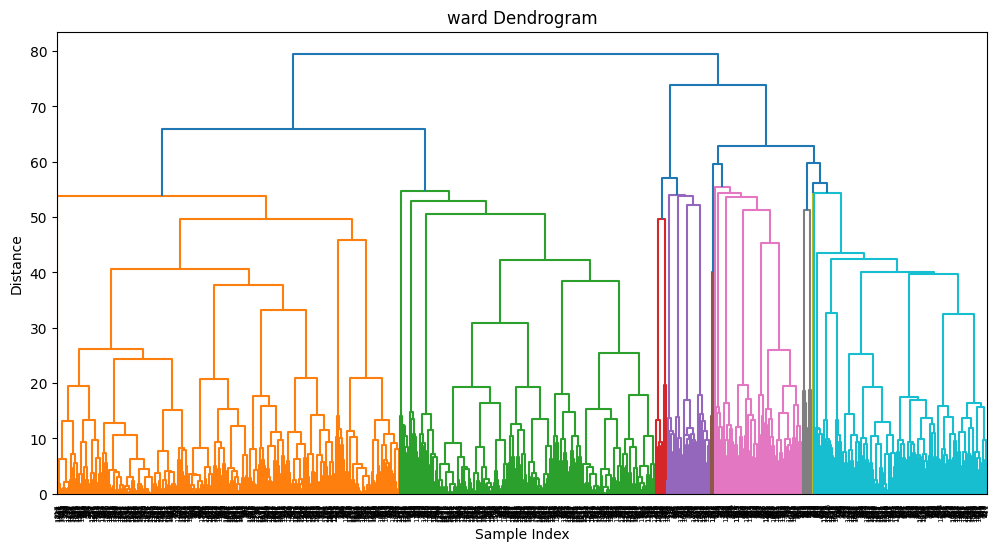

In [199]:
linkage_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'ward']

for method in linkage_methods:
  Z = linkage(pca_features, method=method)  # 'ward' is just one of the linkage methods
  plt.figure(figsize=(12, 6))
  name = method + ' Dendrogram'
  plt.title(name)
  plt.xlabel('Sample Index')
  plt.ylabel('Distance')
  dendrogram(Z)
  plt.show()

# Support Vector Machine

The SVM tries to draw a line that acts as a border between objects of the two different classes. In 3D space this is a hyperplane.

In [200]:
import sklearn
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(diagnosis.copy())])

In [201]:
scaler = StandardScaler()
pca = PCA()
svc = svm.SVC()

pipe = Pipeline([('scaler', scaler), ('pca', pca), ('svm', svc)])

param_grid = {
    'pca__n_components': [30],#list(range(10, 30)),
    #'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized'],
    #'svm__kernel': ('linear', 'rbf', 'poly'),
    #'svm__C': [0.1, 1, 5],
    #'svm__gamma': [0.1, 1, 'auto'],
    #'svm__degree': [2, 3]
}

gs = GridSearchCV(
    pipe, param_grid, cv=5
)



results = sklearn.model_selection.cross_val_score (gs, features, y_train, cv=5, scoring='recall')
mean_f1 = np.mean(results)
print("Mean F1-score:", mean_f1)

#result = sklearn.model_selection.cross_val_score(gs, features, diagnosis, cv=5)
#print("Accuracy: ",np.mean(result))

Mean F1-score: 0.0125


This is our first attempt. Not sure how the f score is so low, but now we can tune some hyperparameters and hopefully make the model more accurate. We will also use SMOTE to provide more examples of the low frequency class to train on.

In [202]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

pipe = imbpipeline([
    ('smote', SMOTE()),
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', svm.SVC())
])

# Define parameter grid with hyperparameters to tune
param_grid = {
    'pca__n_components': [5,10,15,30],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 0.5],
    'svm__gamma': ['scale', 'auto']
}

gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1')

# Fit grid search on the data
gs.fit(features, y_train)

# Print best parameters and mean recall
print("Best parameters:", gs.best_params_)
print("Mean f1:", gs.best_score_)

Best parameters: {'pca__n_components': 10, 'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Mean f1: 0.28573977146027035


The last cell improved on the F score, but it still seemed low. Here we try to tune the hyperparamters even more, but it didn't really change the F score.

In [203]:
pipe = imbpipeline([
    ('smote', SMOTE()),
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', svm.SVC(kernel='poly'))
])

# Define parameter grid with hyperparameters to tune
param_grid = {
    'pca__n_components': [2,3,4,5],
    #'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.2, 0.7, 0.5],
    'svm__gamma': ['scale', 'auto'],
    'svm__degree': [2, 3, 4],
}

gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1')

# Fit grid search on the data
gs.fit(features, y_train)

# Print best parameters and mean recall
print("Best parameters:", gs.best_params_)
print("Mean f1:", gs.best_score_)

#Best parameters: {'pca__n_components': 5, 'svm__C': 0.5, 'svm__degree': 4, 'svm__gamma': 'auto'}
#Mean f1: 0.27479667391432094 (output )

Best parameters: {'pca__n_components': 3, 'svm__C': 0.5, 'svm__degree': 3, 'svm__gamma': 'auto'}
Mean f1: 0.29491191066533534


Lets see if using ADASYN, or SMOTE+Tomek, or SMOTE ENN will help

In [204]:
#from imblearn.combine import SMOTETomek, SMOTEENN
#from imblearn.over_sampling import ADASYN
#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline as imbpipeline

#populators = [SMOTE(),ADASYN(), SMOTETomek(), SMOTEENN()]

#for pop in populators:
#  pipe = imbpipeline([
#      ('pop', pop),
#      ('scaler', StandardScaler()),
#      ('pca', PCA()),
#      ('svm', svm.SVC())
#  ])

  # Define parameter grid with hyperparameters to tune
#  param_grid = {
#      'pca__n_components': [3,4],
#      'svm__kernel': [ 'rbf', 'poly'],
#      'svm__C': [ 0.7, 0.5],
#      'svm__gamma': ['scale', 'auto'],
#      'svm__degree': [3, 4],
#  }

#  gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1')

  # Fit grid search on the data
#  gs.fit(features, y_train)

  # Print best parameters and mean recall
#  print(f"Populating technique: {pop}")
#  print("Best parameters:", gs.best_params_)
#  print("Mean f1:", gs.best_score_)

"Populating technique: SMOTE()\nBest parameters: {'pca__n_components': 3, 'svm__C': 0.5, 'svm__degree': 3, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}\nMean f1: 0.27787855715237464\nPopulating technique: ADASYN()\nBest parameters: {'pca__n_components': 3, 'svm__C': 0.5, 'svm__degree': 3, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}\nMean f1: 0.26057971014492753\nPopulating technique: SMOTETomek()\nBest parameters: {'pca__n_components': 3, 'svm__C': 0.7, 'svm__degree': 3, 'svm__gamma': 'scale', 'svm__kernel': 'poly'}\nMean f1: 0.26543682533412954\nPopulating technique: SMOTEENN()\nBest parameters: {'pca__n_components': 3, 'svm__C': 0.7, 'svm__degree': 3, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}\nMean f1: 0.23023679630285873"

The different methods to balance the class imbalance did not seem to vary greatly. Now lets try to visualize the SVM line, we will have to use PCA to reduce the dataset to two features to plot them. We use the optimal parameters from our above code.

The graphs are pretty confusing, but it seems like the SVM is having trouble drawing appropriate lines around the data. This probably explains why our F score is so low. These graphs also contain the training data and the SMOTEed data, so they don't really represent the SVM on our dataset.

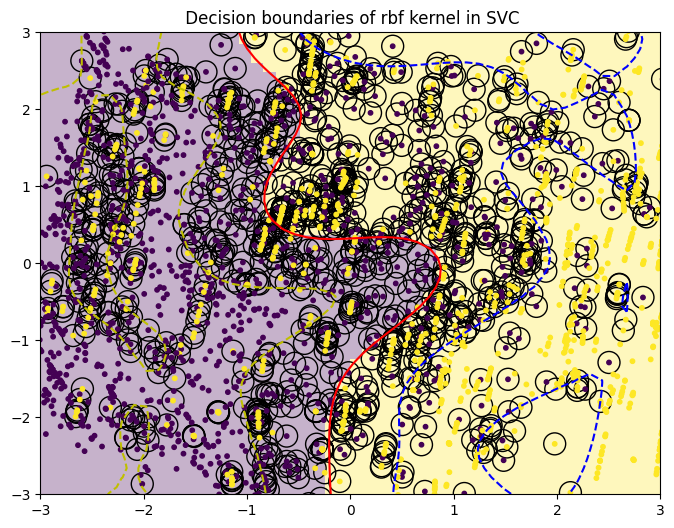

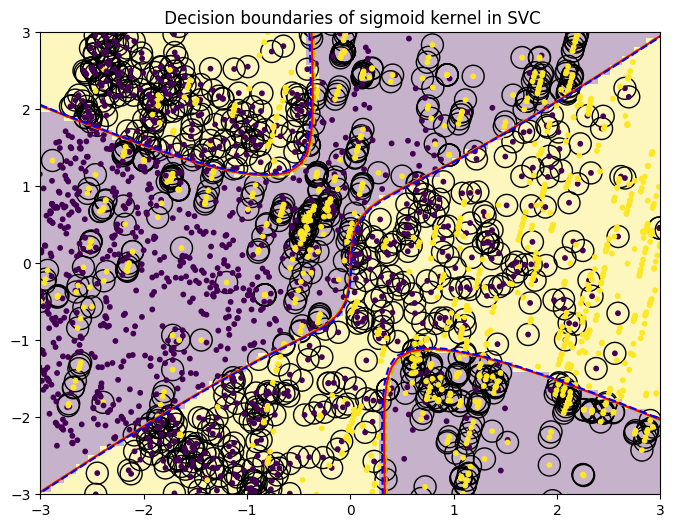

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html

# My SVM Parameters
svm_params1 = {
    'kernel': 'rbf',
    'C': 0.5,
    'degree': 3,
    'gamma': 'auto'
}

svm_params2 = {
    'kernel': 'sigmoid',
    'C': 0.5,
    'degree': 3,
    'gamma': 'auto'
}


def plot_training_data_with_decision_boundary(X, y, svm_params):
    # Apply SMOTE to balance the classes
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Preprocess data with scaling and PCA
    scaler = StandardScaler()
    pca = PCA(n_components=2)
    X_scaled = scaler.fit_transform(X_resampled)
    X_pca = pca.fit_transform(X_scaled)

    # Train the SVC
    clf = svm.SVC(**svm_params).fit(X_pca, y_resampled)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(8, 6))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X_pca, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["y", "r", "b"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled, s=10)
    ax.set_title(f" Decision boundaries of {svm_params['kernel']} kernel in SVC")

    _ = plt.show()

# Call the function with the specified SVM parameters
plot_training_data_with_decision_boundary(features, diagnosis, svm_params1)
plot_training_data_with_decision_boundary(features, diagnosis, svm_params2)


## Naive Bayes Classifier (Gaussian and Complement)

Naive Bayes is a classification algorithm based on Bayes' theorem with the "naive" assumption of independence between features. In the following models, we use Gaussian and Complement Naive Bayes to try predicting the class label.

Multinomial Naive Bayes (MNB) is a variant of the Naive Bayes algorithm specifically designed for text classification tasks where the features represent the frequency of words or other discrete features.

Complementary Naive Bayes (CNB) is a variant of the Naive Bayes algorithm that is specifically designed to address class imbalance in text classification tasks.

While this is not a text classification dataset, we have modeled the urinalysis dataset after the same through discretization of numerical features in order to utilize the class imbalance protections.

We will also perform the SMOTE, ADASYN, SMOTE + Tomek, and SMOTE + ENN techniques on the MNB data to increase the number of positive label data.

We will evaluate the model's predictions with a 5-fold cross validation loop and class balancing technique applied to the training sets.



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB

features_nb = features # copy of features to use

# Multinomial
mnb = MultinomialNB()
acc = 0
num_folds = 5
fold_size = len(features_nb)/num_folds

for i in range(num_folds):
  # Partition data into train_set and test_set
  test_start = i * fold_size
  test_end = (i + 1) * fold_size
  X_test = features_nb.loc[test_start:test_end]
  Y_test = diagnosis.loc[test_start:test_end]
  X_train = pd.concat([features_nb.loc[:test_start], features_nb.loc[test_end:]], ignore_index=True)
  Y_train = pd.concat([diagnosis.loc[:test_start], diagnosis.loc[test_end:]], ignore_index=True)

  #perform smote inside cross validation
  smt = SMOTE()
  X_adjusted, Y_adjusted = smt.fit_resample(X_train, Y_train)

  # counter = Counter(Y_adjusted)
  # print('After SMOTE:', counter)

  total_acc = 0
  mnb = mnb.fit(X_adjusted, Y_adjusted)
  preds = mnb.predict(X_test)

  acc += accuracy_score(Y_test, preds)

print("SMOTE Multinomial NB results")
print("Average accuracy:", acc/5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SMOTE Multinomial NB results
Average accuracy: 0.7894489782216916


In [ ]:
# next, trying ADASYN
acc = 0

for i in range(num_folds):
  # Partition data into train_set and test_set
  test_start = i * fold_size
  test_end = (i + 1) * fold_size
  X_test = features_nb.loc[test_start:test_end]
  Y_test = diagnosis.loc[test_start:test_end]
  X_train = pd.concat([features_nb.loc[:test_start], features_nb.loc[test_end:]], ignore_index=True)
  Y_train = pd.concat([diagnosis.loc[:test_start], diagnosis.loc[test_end:]], ignore_index=True)

  #perform balancing inside cross validation
  ada = ADASYN(random_state=10)
  X_adjusted, Y_adjusted = ada.fit_resample(X_train, Y_train)
  # counter = Counter(Y_adjusted)
  # print('After ADASYN:', counter)

  total_acc = 0
  mnb = mnb.fit(X_adjusted, Y_adjusted)
  preds = mnb.predict(X_test)

  acc += accuracy_score(Y_test, preds)

print("ADASYN Multinomial NB results")
print("Average accuracy:", acc/5)
print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ADASYN Multinomial NB results
Average accuracy: 0.7817467355488293



In [ ]:
# next, trying smote + tomek
acc = 0

for i in range(num_folds):
  # Partition data into train_set and test_set
  test_start = i * fold_size
  test_end = (i + 1) * fold_size
  X_test = features_nb.loc[test_start:test_end]
  Y_test = diagnosis.loc[test_start:test_end]
  X_train = pd.concat([features_nb.loc[:test_start], features_nb.loc[test_end:]], ignore_index=True)
  Y_train = pd.concat([diagnosis.loc[:test_start], diagnosis.loc[test_end:]], ignore_index=True)

  #perform balancing inside cross validation
  smtom = SMOTETomek(random_state=10)
  X_adjusted, Y_adjusted = smtom.fit_resample(X_train, Y_train)
  # counter = Counter(Y_adjusted)
  # print('After SMOTE + Tomek Links:', counter)

  total_acc = 0
  mnb = mnb.fit(X_adjusted, Y_adjusted)
  preds = mnb.predict(X_test)

  acc += accuracy_score(Y_test, preds)

print("SMOTE + Tomek Links Multinomial NB results")
print("Average accuracy:", acc/5)
print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SMOTE + Tomek Links Multinomial NB results
Average accuracy: 0.7922486690839039



In [ ]:
# next, trying SMOTE + ENN
acc = 0

for i in range(num_folds):
  # Partition data into train_set and test_set
  test_start = i * fold_size
  test_end = (i + 1) * fold_size
  X_test = features_nb.loc[test_start:test_end]
  Y_test = diagnosis.loc[test_start:test_end]
  X_train = pd.concat([features_nb.loc[:test_start], features_nb.loc[test_end:]], ignore_index=True)
  Y_train = pd.concat([diagnosis.loc[:test_start], diagnosis.loc[test_end:]], ignore_index=True)

  #perform balancing inside cross validation
  smenn = SMOTEENN()
  X_adjusted, Y_adjusted = smenn.fit_resample(X_train, Y_train)
  # counter = Counter(Y_adjusted)
  # print('After SMOTE + ENN:', counter)

  total_acc = 0
  mnb = mnb.fit(X_adjusted, Y_adjusted)
  preds = mnb.predict(X_test)

  acc += accuracy_score(Y_test, preds)

print("SMOTE + ENN Multinomial NB results")
print("Average accuracy:", acc/5)
print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SMOTE + ENN Multinomial NB results
Average accuracy: 0.7754627927051946



### Complementary Naive Bayes

The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.

In [ ]:
# Complement Naive Bayes is better suited to imbalanced data sets, and was designed to correct the assumptions
# made by the standard Multionmial NB classifier.

cnb = ComplementNB()
acc = 0
prec = 0
rec = 0

num_folds = 5
fold_size = len(features)/num_folds

for i in range(num_folds):
  # Partition data into train_set and test_set
  test_start = i * fold_size
  test_end = (i + 1) * fold_size
  X_test = features.loc[test_start:test_end]
  Y_test = diagnosis.loc[test_start:test_end]
  X_train = pd.concat([features.loc[:test_start], features.loc[test_end:]], ignore_index=True)
  Y_train = pd.concat([diagnosis.loc[:test_start], diagnosis.loc[test_end:]], ignore_index=True)

  #perform smote inside cross validation
  #smt = SMOTE()
  #X_adjusted, Y_adjusted = smt.fit_resample(X_train, Y_train)

  #counter = Counter(Y_adjusted)
  #print('After SMOTE:', counter)

  total_acc = 0
  cnb = cnb.fit(X_train, Y_train)
  preds = cnb.predict(X_test)

  acc += accuracy_score(Y_test, preds)
  prec += precision_score(Y_test, preds)
  rec += recall_score(Y_test, preds)

print("Complementary NB results")
print("Average accuracy: ", acc/5)
print("Average precision: ", prec/5)
print("Average recall: ", rec/5)

Complementary NB results
Average accuracy:  0.7887546190934428
Average precision:  0.13114257016696043
Average recall:  0.5274509803921569


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Comparing Multinomial and Complementary Naive Bayes, Multinomial with class balancing seems to work better than Complementary. The most likely explanation is due to the severity of the class imbalance present in the original dataset: even if CNB is suited to class imbalances, the one in the original dataset is too severe and cannot be well predicted with NB.

## Association analysis/Apriori

The Apriori algorithm identifies frequent itemsets, which are sets of items (e.g., products in a transaction) that frequently occur together in the dataset. We will use the rules generated to find patterns within the dataset. We will also apply the various class balancing techniques.

Some requirements of the Apriori algorithm is for data to be in the form of True/False or 1/0. Thus, we use thresholds to bin certain numerical features, including age, pH, and specific gravity.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
features_aa = features  # copy of features to use

# Apriori algorithm

# turn everything into T/F values
age_thresh = features_aa['Age'].mean() # thresholds chosen as the average
features_aa.loc[features_aa['Age'] > age_thresh, 'Age'] = True
features_aa.loc[features_aa['Age'] <= age_thresh, 'Age'] = False

# print(features_aa)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# threshold for pH
# calculate the average pH for positive and negative class labels
# the average is the threshold

sum = 0
count = 0
for i in range(len(diagnosis)):
  # Check if the label is equal to 1
  positive = 0;
  if (diagnosis.iloc[i] == 1):
    sum += features.iloc[i]['pH']
    count +=1
avg_pos_pH = sum/count

sum = 0
count = 0
for i in range(len(diagnosis)):
  # Check if the label is equal to 0
  positive = 0;
  if diagnosis.iloc[i] == 0:
    sum += features.iloc[i]['pH']
    count +=1
avg_neg_pH = sum/count

pH_thresh = avg_neg_pH + avg_pos_pH / 2

features_aa['pH'] = features_aa['pH'] > pH_thresh

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# threshold for gravity
# calculate the average gravity for positive and negative class labels
# the average is the threshold

sum_pos = 0
count_pos = 0

for i in range(len(diagnosis)):
    if diagnosis.iloc[i] == 1:
        sum_pos += features_aa.iloc[i]['Specific Gravity']
        count_pos += 1
avg_pos_gravity = sum_pos / count_pos if count_pos > 0 else 0

sum_neg = 0
count_neg = 0
for i in range(len(diagnosis)):
    if diagnosis.iloc[i] == 0:
        sum_neg += features_aa.iloc[i]['Specific Gravity']
        count_neg += 1
avg_neg_gravity = sum_neg / count_neg if count_neg > 0 else 0

gravity_thresh = (avg_neg_gravity + avg_pos_gravity) / 2

# Classify gravity values based on threshold
features_aa['Specific Gravity'] = features_aa['Specific Gravity'] > gravity_thresh


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Finding the patterns

We will now apply the different class imbalance techniques and comment on the findings of the generated rules.

In [ ]:
# class imbalance technique: SMOTE

acc = 0
num_folds = 5
fold_size = len(features_aa)/num_folds

# with SMOTE
smt = SMOTE()
X_adjusted, Y_adjusted = smt.fit_resample(X_train, Y_train)
counter = Counter(Y_adjusted)
print('After SMOTE:', counter)

frequent_itemsets = apriori(X_adjusted, min_support=0.1, use_colnames=True)
# anything above min_threshold = 2 typically generates no rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2)

print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


After SMOTE: Counter({0: 1072, 1: 1072})
                                           antecedents  \
0                                      (Bacteria_RARE)   
1                                             (Gender)   
2                                   (Specific Gravity)   
3                                  (Color_DARK YELLOW)   
4                                  (Transparency_HAZY)   
..                                                 ...   
685  (Bacteria_RARE, Amorphous Urates_NONE SEEN, Gl...   
686  (Bacteria_RARE, Protein_NEGATIVE, Amorphous Ur...   
687        (Epithelial Cells_RARE, Transparency_CLEAR)   
688                  (Bacteria_RARE, Glucose_NEGATIVE)   
689                  (Bacteria_RARE, Protein_NEGATIVE)   

                                           consequents  antecedent support  \
0                                             (Gender)            0.331157   
1                                      (Bacteria_RARE)            0.257929   
2                           

In [ ]:
# with ADASYN

# random_state of 10 was not generating many rules, so changed to 5
ada = ADASYN(random_state=5)
X_adjusted, Y_adjusted = ada.fit_resample(X_train, Y_train)
# counter = Counter(Y_adjusted)
# print('After ADASYN:', counter)

frequent_itemsets = apriori(X_adjusted, min_support=0.1, use_colnames=True)
# anything above min_threshold = 3 generates no rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3)

print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                          antecedents  \
0                   (Bacteria_RARE, Specific Gravity)   
1                      (Bacteria_RARE, Protein_TRACE)   
2              (Specific Gravity, Transparency_CLEAR)   
3                 (Transparency_CLEAR, Protein_TRACE)   
4   (Bacteria_RARE, Specific Gravity, Glucose_NEGA...   
5   (Specific Gravity, Transparency_CLEAR, Glucose...   
6    (Bacteria_RARE, Protein_TRACE, Glucose_NEGATIVE)   
7   (Protein_TRACE, Transparency_CLEAR, Glucose_NE...   
8                   (Bacteria_RARE, Specific Gravity)   
9              (Specific Gravity, Transparency_CLEAR)   
10                     (Bacteria_RARE, Protein_TRACE)   
11                (Transparency_CLEAR, Protein_TRACE)   
12  (Bacteria_RARE, Specific Gravity, Amorphous Ur...   
13  (Specific Gravity, Amorphous Urates_NONE SEEN,...   
14  (Bacteria_RARE, Amorphous Urates_NONE SEEN, Pr...   
15  (Amorphous Urates_NONE SEEN, Transparency_CLEA...   
16                  (Bacteria_R

In [ ]:
# with SMOTE + Tomek

smtom = SMOTETomek(random_state=10)
X_adjusted, Y_adjusted = smtom.fit_resample(X_train, Y_train)
# counter = Counter(Y_adjusted)
# print('After SMOTE + Tomek Links:', counter)

frequent_itemsets = apriori(X_adjusted, min_support=0.1, use_colnames=True)
# anything above min_threshold = 3 typically generates no rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3)

print(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                          antecedents  \
0              (Epithelial Cells_RARE, Bacteria_RARE)   
1                        (Gender, Transparency_CLEAR)   
2   (Epithelial Cells_RARE, Bacteria_RARE, Glucose...   
3      (Gender, Transparency_CLEAR, Glucose_NEGATIVE)   
4              (Epithelial Cells_RARE, Bacteria_RARE)   
5                        (Gender, Transparency_CLEAR)   
6   (Epithelial Cells_RARE, Bacteria_RARE, Amorpho...   
7   (Gender, Amorphous Urates_NONE SEEN, Transpare...   
8              (Epithelial Cells_RARE, Bacteria_RARE)   
9                        (Gender, Transparency_CLEAR)   
10  (Epithelial Cells_RARE, Bacteria_RARE, Amorpho...   
11  (Gender, Amorphous Urates_NONE SEEN, Transpare...   
12  (Epithelial Cells_RARE, Bacteria_RARE, Glucose...   
13  (Epithelial Cells_RARE, Bacteria_RARE, Amorpho...   
14     (Gender, Transparency_CLEAR, Glucose_NEGATIVE)   
15  (Gender, Amorphous Urates_NONE SEEN, Transpare...   
16             (Epithelial Cell

In [ ]:
# with SMOTE + enn

smenn = SMOTEENN()
X_adjusted, Y_adjusted = smenn.fit_resample(X_train, Y_train)
counter = Counter(Y_adjusted)
print('After SMOTE + enn', counter)

frequent_itemsets = apriori(X_adjusted, min_support=0.1, use_colnames=True)
# anything above min_threshold = 3 typically generates no rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3)

print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


After SMOTE + enn Counter({1: 1005, 0: 864})
                                         antecedents  \
0             (Epithelial Cells_RARE, Bacteria_RARE)   
1                         (Protein_NEGATIVE, Gender)   
2  (Epithelial Cells_RARE, Bacteria_RARE, Protein...   
3  (Epithelial Cells_RARE, Bacteria_RARE, Transpa...   
4     (Gender, Protein_NEGATIVE, Transparency_CLEAR)   
5             (Epithelial Cells_RARE, Bacteria_RARE)   
6                         (Protein_NEGATIVE, Gender)   
7                       (Gender, Transparency_CLEAR)   

                                         consequents  antecedent support  \
0                         (Protein_NEGATIVE, Gender)            0.242911   
1             (Epithelial Cells_RARE, Bacteria_RARE)            0.139112   
2                       (Gender, Transparency_CLEAR)            0.141252   
3                         (Protein_NEGATIVE, Gender)            0.237025   
4             (Epithelial Cells_RARE, Bacteria_RARE)            0.1332

## Rules Analysis

Due to the volatility of these balancing techniques, the rules produced each time are different with a min threshold of 3. In addition, the SMOTE + combo techniques tend to generate less rules than ADASYN, with the SMOTE technique by itself needing a min threshold of 2 in order to generate any rules at all.



# Conclusion

Overall, each of our models seemed to struggle finding any consistent patterns in the data. This honestly came as a bit of a surprise as we figured that it would be trivial to link some health statistics with UTI’s. For example, for most health datasets like this we can simply link obesity to heart attacks or something along those lines. As it turned out however, UTI’s seem to be a much harder condition to diagnose according to this specific dataset. Ultimately, the random forests were semi-functional as they got a decent F-score of 0.27 compared to our other models. Moreover, since there were too many features, both of the clustering models (k-means and hierarchical) were unable to perform well and had very low silhouette scores. Also, according to our SVM graphs, it is clear that the model is having trouble drawing appropriate lines around the data, but it still received a relatively high F-score value of 0.285 compared to our other models. Multinomial with class balancing seems to work better than Complementary NB. Due to the severity of the class imbalance present in the original dataset: even if CNB is suited to class imbalances, the one in the original dataset is too severe and cannot be well predicted with NB. SImilarly, association analysis also performed poorly and randomly due to the great differences between balances techniques.
